# Amazon Fires

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('amazon.csv', encoding = "iso-8859-1", parse_dates=['date'])

In [3]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

### display top 5 rows 

In [4]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


### last 5 rows

In [5]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


### Find shape of the dataset

In [6]:
print("Rows: ", data.shape[0])
print("Columns: ", data.shape[1])

Rows:  6454
Columns:  5


### Info of the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


### check for dupplicates

In [8]:
data.duplicated().any()

np.True_

In [9]:
data = data.drop_duplicates()

In [10]:
data

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


### Check null values in dataset

In [11]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

### Overall statistics for dataset

In [12]:
data.describe(include = 'all')

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Setembro,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


### Rename Month Names to English

In [13]:
data['month_new']=data['month'].map({'Janeiro': 'January', 'Fevereiro':'February','Março':'March', 'Abril':'April','Maio':'May', 'Junho':'June', 'Julho':'July', 'Agosto':'August','Setembro':'September','Outubro':'October','Novembro':'November','Dezembro':'December'})

In [14]:
data.head()

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,January
1,1999,Acre,Janeiro,0.0,1999-01-01,January
2,2000,Acre,Janeiro,0.0,2000-01-01,January
3,2001,Acre,Janeiro,0.0,2001-01-01,January
4,2002,Acre,Janeiro,0.0,2002-01-01,January


### Total Number of Fires Reported

In [15]:
data.shape

(6422, 6)

### in which month maximum number of forest fres were reported

In [16]:
data.groupby('month_new')['number'].sum().reset_index()

,month_new,number
0,April,28184.770
1,August,88050.435
2,December,57535.480
3,February,30839.050
4,January,47681.844
5,July,92319.113
6,June,55997.675
7,March,30709.405
8,May,34725.363
9,November,85508.054


<Axes: xlabel='month_new', ylabel='number'>

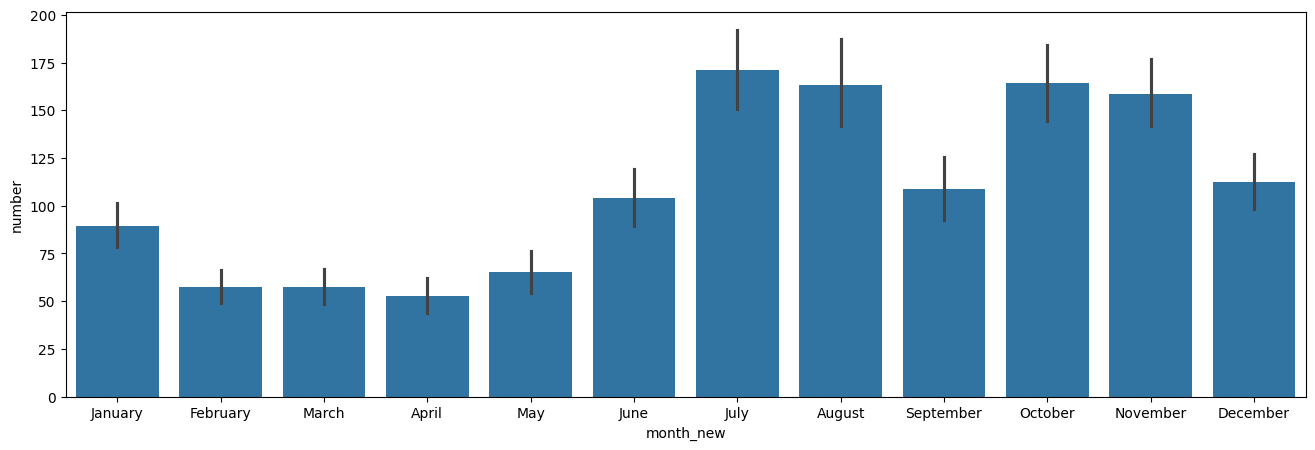

In [17]:
plt.figure(figsize=(16,5))
sns.barplot(x='month_new',y='number',data=data)

### In which year maximum number of forest fires were reported

In [18]:
data2 = data.groupby('year')['number'].sum().reset_index()

In [19]:
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


In [20]:
plt.figure(figsize = (16,5))
sns.barplot(x= "year", y= "number",data = tips, data=data2)

SyntaxError: keyword argument repeated: data (3433340850.py, line 2)

<Figure size 1600x500 with 0 Axes>

### In  which state maximum number of forest fires were recorded

In [21]:
data3 = data.groupby('state')['number'].sum().reset_index()

In [22]:
data3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


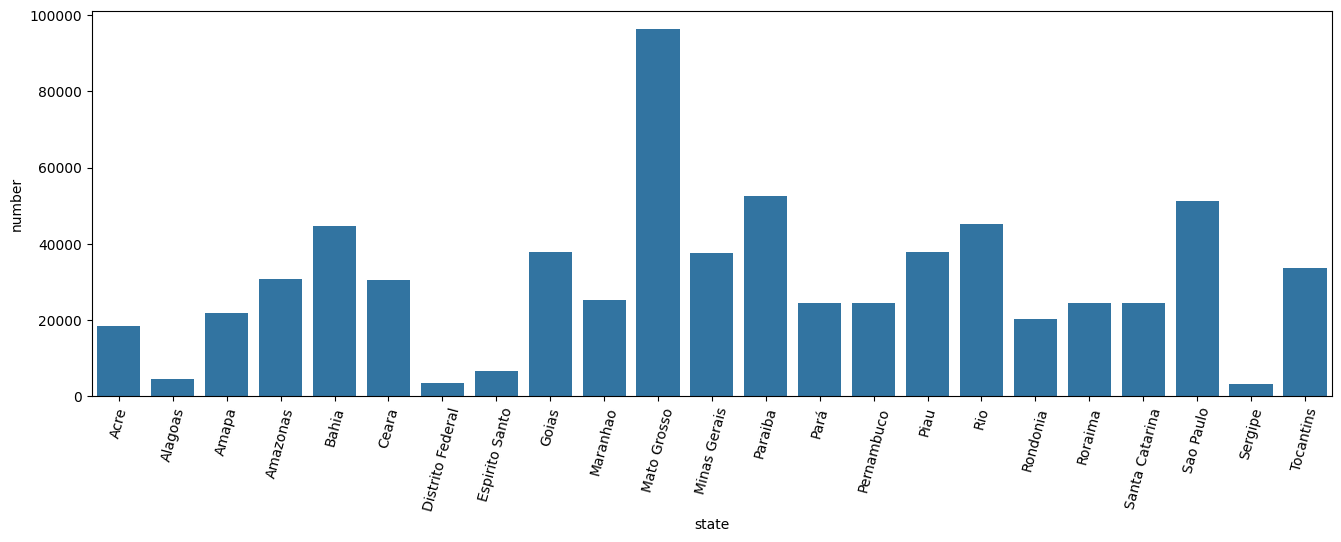

In [23]:
plt.figure(figsize=(16,5))
sns.barplot(x='state', y='number', data=data3)
plt.xticks(rotation=75)
plt.show()

### Total number of Forest Fires reported in Amazonas

In [24]:
data[data['state']=='Amazonas']['number'].sum()

np.float64(30650.129)

### Display number of fires were reported in Amazonas (Year Wise)

In [25]:
data4 = data[data['state']=='Amazonas']
data4

,year,state,month,number,date,month_new
718,1998,Amazonas,Janeiro,0.0,1998-01-01,January
719,1999,Amazonas,Janeiro,3.0,1999-01-01,January
720,2000,Amazonas,Janeiro,7.0,2000-01-01,January
721,2001,Amazonas,Janeiro,3.0,2001-01-01,January
722,2002,Amazonas,Janeiro,17.0,2002-01-01,January
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,December
953,2013,Amazonas,Dezembro,236.0,2013-01-01,December
954,2014,Amazonas,Dezembro,293.0,2014-01-01,December
955,2015,Amazonas,Dezembro,565.0,2015-01-01,December


In [26]:
data5 = data4.groupby('year')['number'].sum().reset_index()

In [27]:
data5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


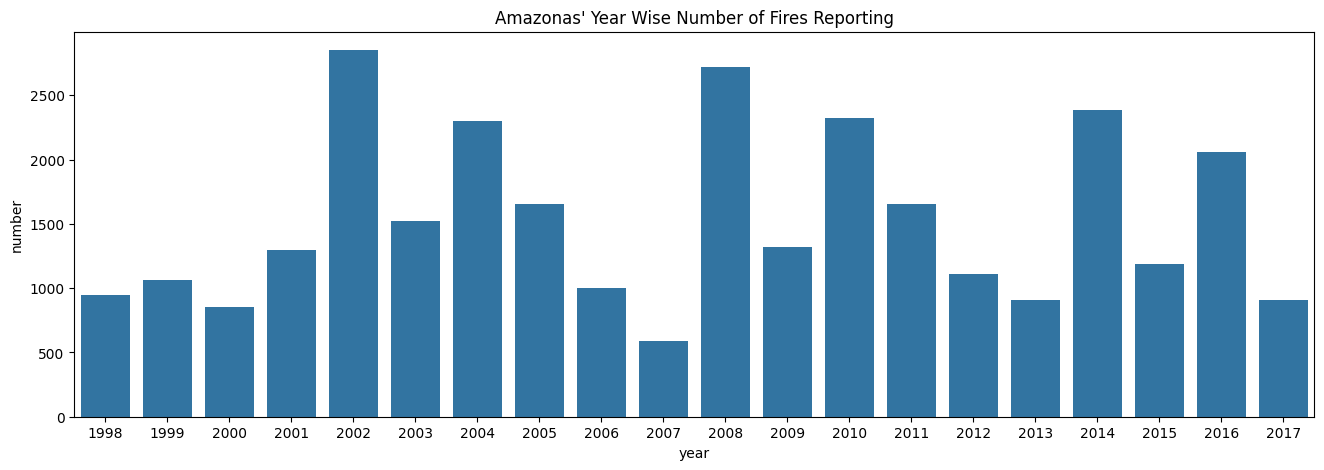

In [28]:
plt.figure(figsize = (16,5))
sns.barplot(x='year',y='number', data=data5)
plt.title("Amazonas' Year Wise Number of Fires Reporting")
plt.show()

### Display number of fires were reported in Amazonas (Day-Wise)

In [29]:
data6 = data[data['state']=='Amazonas']

In [30]:
day = data6.groupby(data6['date'].dt.dayofweek).count().number

In [31]:
import calendar

day.index = [calendar.day_name[x] for x in range(0,7)]
day = day.reset_index()

In [32]:
day

,index,number
0,Monday,24
1,Tuesday,36
2,Wednesday,24
3,Thursday,48
4,Friday,36
5,Saturday,36
6,Sunday,35


<Axes: xlabel='index', ylabel='number'>

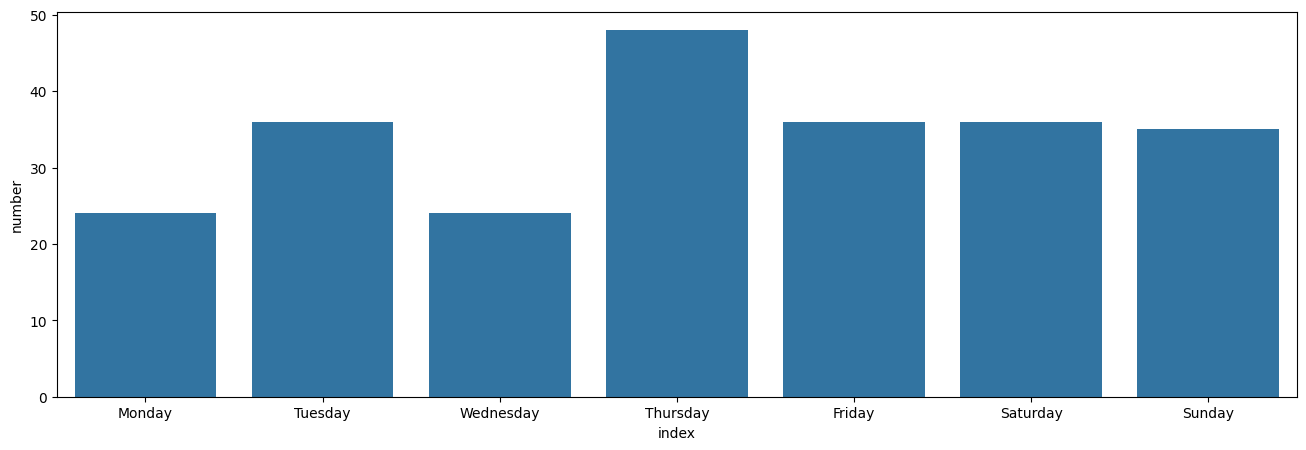

In [33]:
plt.figure(figsize=(16,5))
sns.barplot(x='index',y='number',data = day)

### Find Total Number of fires were reported in 2015 and visualize data based on each 'Month'

In [38]:
fire = data[data['year'] == 2015].groupby('month_new')['number'].sum().reset_index()

In [39]:
fire

,month_new,number
0,April,2573.000
1,August,4363.125
2,December,4088.522
3,February,2309.000
4,January,4635.000
5,July,4364.392
6,June,3260.552
7,March,2202.000
8,May,2384.000
9,November,4034.518


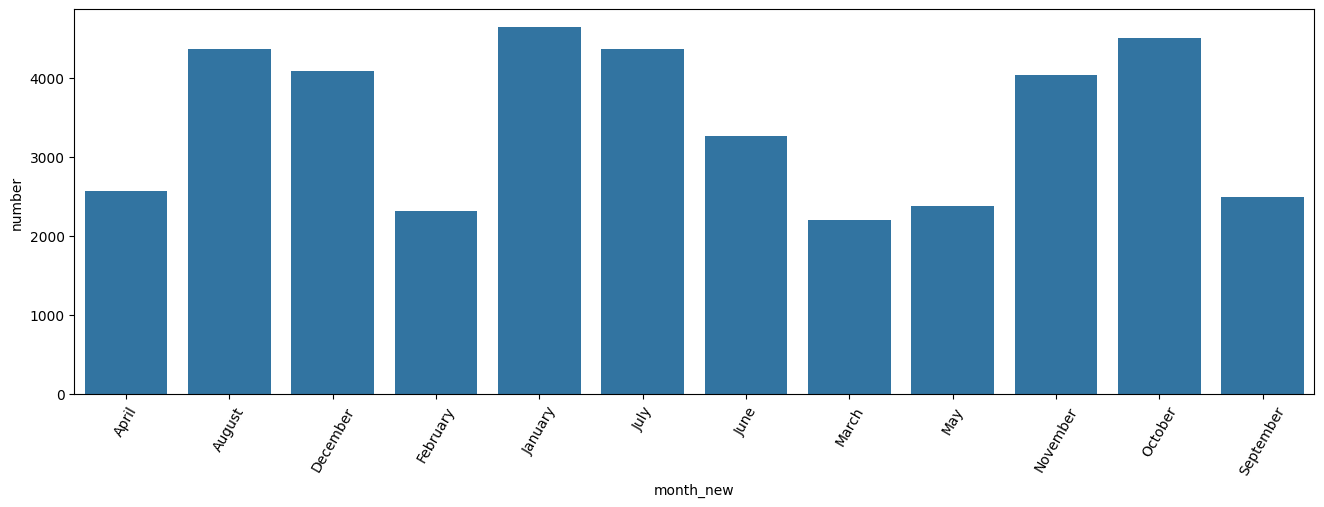

In [43]:
plt.figure(figsize=(16,5))
sns.barplot(x = 'month_new', y = 'number', data = fire)
plt.xticks(rotation = 60)
plt.show()

### Find the average number of fires that were reported from highest to lowest (Statewise)???

In [46]:
data8 = data.groupby('state')['number'].mean().sort_values(ascending = False).reset_index()

In [47]:
data8

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


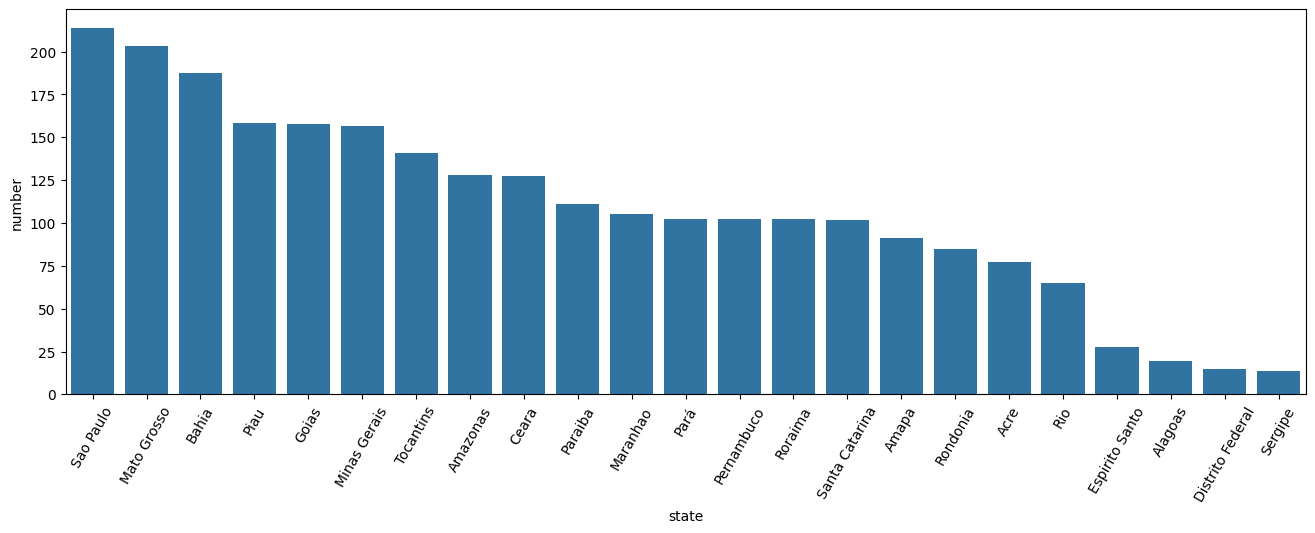

In [48]:
plt.figure(figsize = (16,5))
sns.barplot(x= "state", y = "number", data = data8)
plt.xticks(rotation = 60)
plt.show()

### To give the names of the states where fire were detected in the month of December

In [56]:
data[data['month_new'] == 'December']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)